## **Model traning and Evaluation:**

within this step, we implemented a Random Forest classifier to predict disease severity, specifically distinguishing Stage IV samples from the remaining groups (aggregated as "Rest") within the Secretory Epithelial-2 population.

To ensure  model performance despite dataset imbalances, we employ a  preprocessing pipeline:

*   missing data is imputed using MICE (Multivariate Imputation by Chained Equations)
*   he minority class (Stage IV) is synthetically upsampled using SMOTE (Synthetic Minority Over-sampling Technique) to achieve a balanced training distribution.
*   we utilize the Boruta algorithm,a wrapper around Random Forest, to perform all-relevant feature selection, isolating the specific genes that hold statistically significant predictive power over random noise before training the final Random Forest model with 500 decision trees.


### **Load in data**

In [ ]:
exp_data <- read.csv('/content/X.csv', header=FALSE)
metadata <-read.csv('/content/obs.csv')
var_data<- read.csv('/content/var.csv')

rownames(exp_data)<-metadata$CellID
colnames(exp_data)<-var_data$Gene

### **Create Metadata and Expression data for the 3 cell types; Secretory Epithelial-1, Secretory Epithelial-2, STIC lesion**

In [ ]:
library(dplyr)
metadata_SE1 <- metadata[metadata$Celltype %in% c('Secretory Epithelial-1'),]
exp_data_SE1 <- exp_data[rownames(exp_data) %in% metadata_SE1$CellID,]

metadata_SE2 <- metadata[metadata$Celltype %in% c('Secretory Epithelial-2'),]
exp_data_SE2 <- exp_data[rownames(exp_data) %in% metadata_SE2$CellID,]

metadata_STIC <- metadata[metadata$Celltype %in% c('STIC lesion'),]
exp_data_STIC <- exp_data[rownames(exp_data) %in% metadata_STIC$CellID,]


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error: object 'metadata' not found


### **Analyse disease stages in each cell type and select a cell type for analysis and the disease stage for prediction**

In [ ]:
library(tibble)
#random forest to predict disease stage
table(metadata_SE1$Disease_stage)
table(metadata_SE2$Disease_stage)
table(metadata_STIC$Disease_stage)

#subset expression data in SE2 into disease stages
exp_data$CellID <- rownames(exp_data)
exp_data_SE2 <- merge(metadata_SE2[,c('CellID','Disease_stage')],exp_data, by='CellID')
exp_data_SE2$Disease_stage[exp_data_SE2$Disease_stage %in% c('Benign','I','IIIc','IIIc1')] <- c('Rest')
exp_data_SE2 <- tibble::column_to_rownames(exp_data_SE2, "CellID")


Benign      I   IIIc  IIIc1     IV 
  1059      3     26     17     23 


Benign      I   IIIc  IIIc1     IV 
   106    195    411    288    614 


    I  IIIc IIIc1    IV 
  210    20    27    45 

In [ ]:
exp_data_SE2

,Disease_stage,PLEKHN1,C1orf159,B3GALT6,FAM132A,SCNN1D,PUSL1,MXRA8,LOC148413,CDK11B,⋯,DNASE1L1,TAZ,PLXNA3,UBL4A,SLC10A3,GAB3,MPP1,F8,RAB39B,TMLHE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11543L-p1-A19,IV,1.48588553,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.12563338,-0.2100703,-0.1098231,⋯,-0.2414715,-0.2299743,-0.1876729,2.6034037,-0.2910066,-0.06937566,1.7163935,-0.1775671,-0.06982737,-0.32306209
11543L-p1-A20,IV,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,3.02206474,-0.2100703,-0.1098231,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.32306209
11543L-p1-A21,IV,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.12563338,-0.2100703,-0.1098231,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.32306209
11543L-p1-A23,IV,10.00000000,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.12563338,-0.2100703,-0.1098231,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,1.8381207,-0.1775671,-0.06982737,-0.32306209
11543L-p1-B19,IV,-0.09446754,-0.216262,-0.1680179,-0.07628149,0.1970641,-0.2289965,-0.12563338,-0.2100703,-0.1098231,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.32306209
11543L-p1-B21,IV,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.12563338,2.8388826,-0.1098231,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.32306209
11543L-p1-B22,IV,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.12563338,-0.2100703,-0.1098231,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.27473210
11543L-p1-B23,IV,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.12563338,-0.2100703,-0.1098231,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.32306209
11543L-p1-B24,IV,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.12563338,-0.2100703,-0.1098231,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.32306209


**Splitting dataset and using Smote**


In [ ]:
#split into testing and training set
exp_data_SE2$Disease_stage <- as.factor(exp_data_SE2$Disease_stage)

colnames(exp_data_SE2) <- gsub('-','_',colnames(exp_data_SE2))

set.seed(3)  # reproducibility

# Count how many samples you want in test (~30%)
n_total <- nrow(exp_data_SE2)
n_test_target <- round(0.3 * n_total)

# Get indices for Rest and IV
rest_idx <- which(exp_data_SE2$Disease_stage == "Rest")
iv_idx   <- which(exp_data_SE2$Disease_stage == "IV")

# Balanced sampling: take equal numbers from Rest and IV
n_each <- floor(n_test_target / 2)

# If one class has fewer samples than n_each, cap at that
n_each <- min(n_each, length(rest_idx), length(iv_idx))

# Sample indices
test_idx <- c(
  sample(rest_idx, n_each),
  sample(iv_idx, n_each)
)

# Build test and train sets
test.data  <- exp_data_SE2[test_idx, ]
train.data <- exp_data_SE2[-test_idx, ]

# Check sizes and balance
table(test.data$Disease_stage)
table(train.data$Disease_stage)


  IV Rest 
 242  242 


  IV Rest 
 372  758 

In [ ]:
install.packages('mice')
install.packages('smotefamily')
library(mice)
library(smotefamily)

# Separate predictors and target
X <- train.data[, -which(names(train.data) == "Disease_stage")]
y <- train.data$Disease_stage

# Impute missing values in X
imp <- mice(X, m = 1, maxit = 5, method = 'pmm', seed = 123)
X_imputed <- complete(imp)

# Check for NAs
anyNA(X_imputed)  # should be FALSE

# Convert target to numeric (1 = IV, 0 = Rest)
y_numeric <- ifelse(y == "IV", 1, 0)

# Apply SMOTE
smote_result <- SMOTE(X_imputed, y_numeric, K = 5)

# Rebuild training data with synthetic samples
train.data_smote <- smote_result$data
names(train.data_smote)[ncol(train.data_smote)] <- "Disease_stage"
train.data_smote$Disease_stage <- ifelse(train.data_smote$Disease_stage == 1, "IV", "Rest")
train.data_smote$Disease_stage <- as.factor(train.data_smote$Disease_stage)

# Check balance
table(train.data_smote$Disease_stage)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘ucminf’, ‘numDeriv’, ‘iterators’, ‘lme4’, ‘ordinal’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FNN’, ‘dbscan’, ‘igraph’



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind





 iter imp variable
  1   1
  2   1
  3   1
  4   1
  5   1


Warning message:
“Number of logged events: 51”


[1] FALSE


  IV Rest 
 744  758 

### **Random Forest**

**Carry out Boruta**



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ranger’




Boruta performed 99 iterations in 9.669232 mins.
 154 attributes confirmed important: ACTC1, ACTG1P4, ACTG2, ADAM28,
ADH1C and 149 more;
 5523 attributes confirmed unimportant: A2M, A2M_AS1, A2ML1, AACS,
AADAT and 5518 more;
 174 tentative attributes left: ABI3BP, ACTA2, ADAT2, ADH1B, AGFG2 and
169 more;

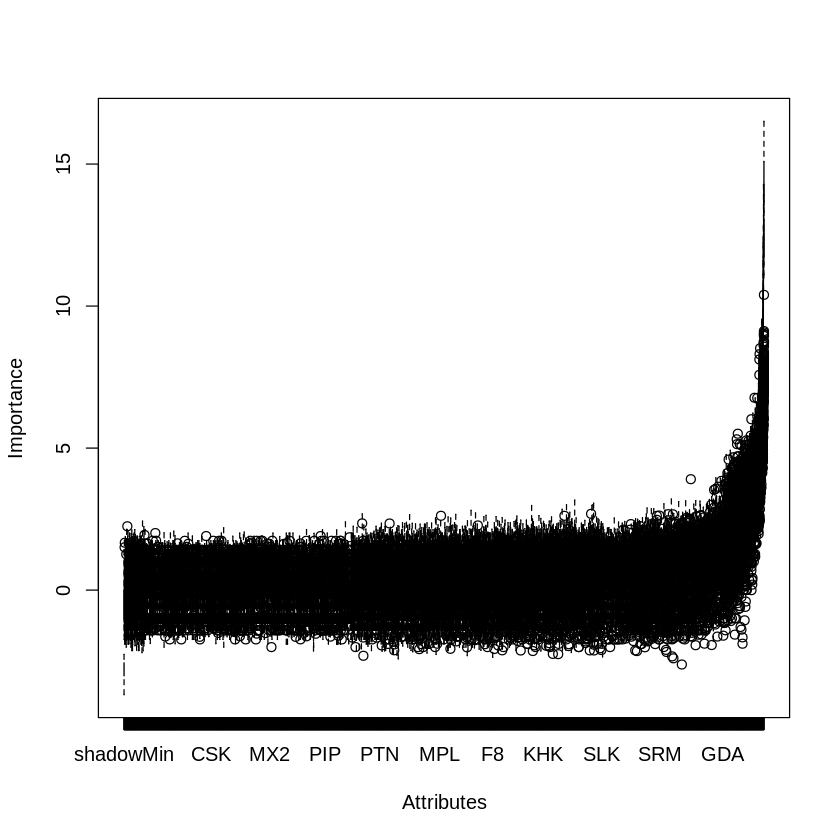

In [ ]:
install.packages("Boruta")
library(Boruta)
bor<-Boruta(Disease_stage~.,data=train.data_smote)
plot(bor)
bor
bor_confirmed <- data.frame(bor$finalDecision[bor$finalDecision %in% "Confirmed"])
bor_confirmed <- rownames(bor_confirmed)

In [ ]:
install.packages("randomForest")
library(randomForest)
set.seed(1)  # Setting seed
rf<-randomForest(Disease_stage~.,data=train.data_smote, ntree = 500)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine




### Plotting model evaluation:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




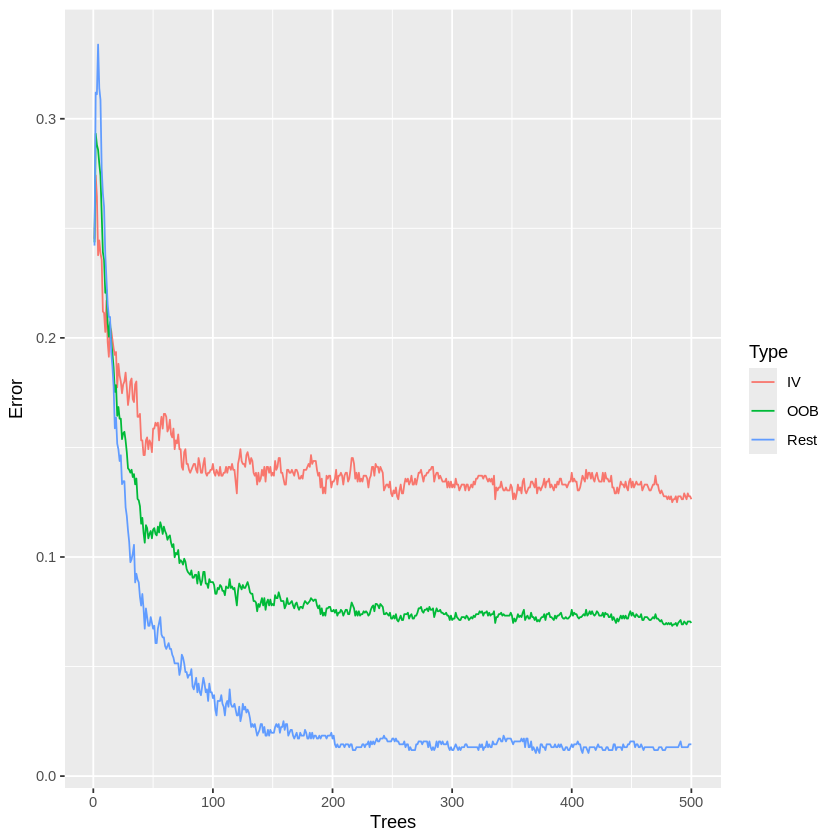

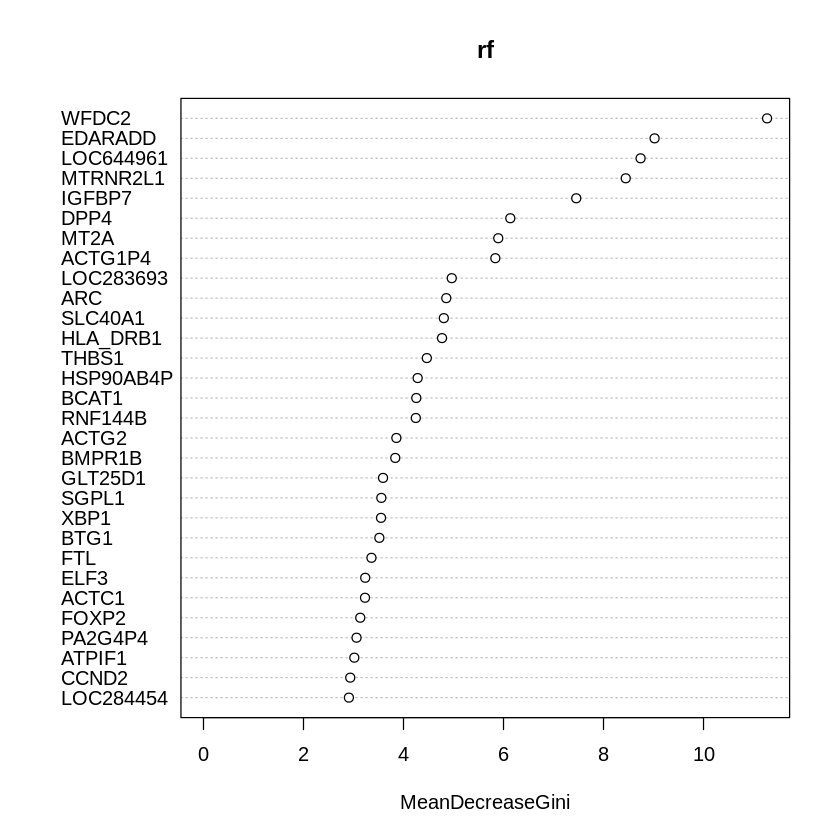

In [ ]:
  install.packages("ggplot2")
  library(ggplot2)
  oob.error.data <- data.frame(Trees = rep(1:nrow(rf$err.rate), times=3),
                              Type = rep(c("OOB","IV","Rest"), each=nrow(rf$err.rate)),
                              Error = c(rf$err.rate[,"OOB"],
                                        rf$err.rate[,"IV"],
                                        rf$err.rate[,"Rest"]))
  ggplot(data = oob.error.data,aes(x=Trees, y=Error))+
    geom_line(aes(color=Type))

  # Variable importance plot
  varImpPlot(rf)

**Figure Interpretation**:
*   The OOB error rate plot shows the stabilization of classification error as the number of trees increases (x-axis), with the green line representing overall OOB error and other lines representing class-specific errors. The error converges quickly, confirming the model has successfully learned the underlying data structure.
*   The Variable Importance Plot ranks genes based on the Mean Decrease in Gini, a measure of how much each gene contributes to the homogeneity of the decision trees. The top-ranked genes, including WFDC2 (HE4, a known ovarian cancer biomarker), IGFBP7, and MT2A (a stress response gene), are among the predictors of Stage IV disease found within the morphologically benign SE2 population.



### **Calculating the Out-of-Bag (OOB) Area under curve (AUC) from the model**:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




[1] 0.9916181

OOB 
0.06990679

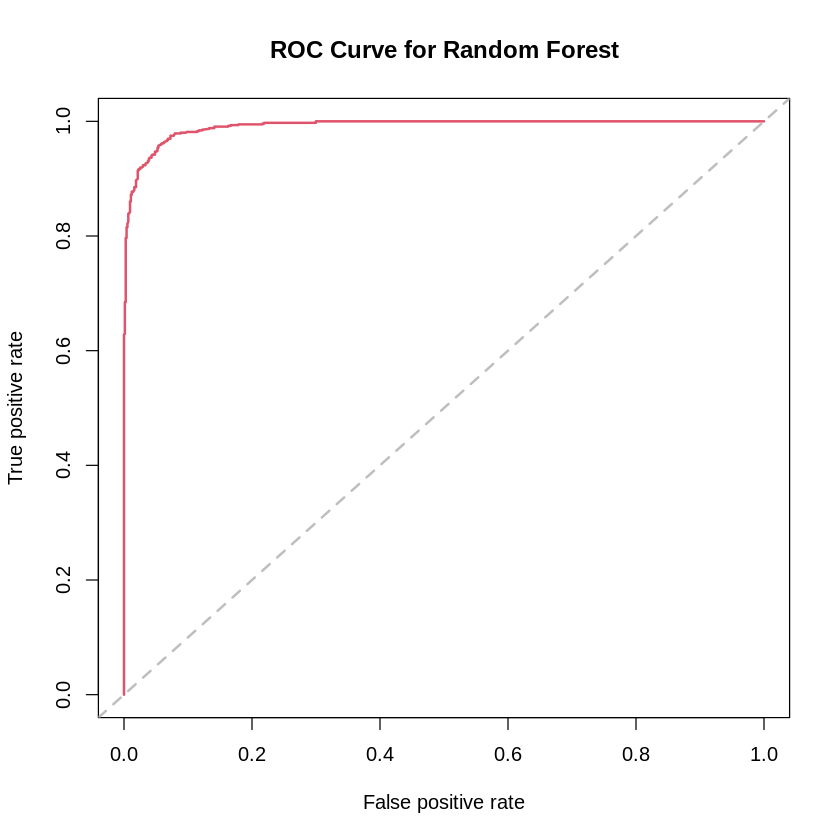

In [ ]:
install.packages("ROCR")
library(ROCR)
#OOB AUC
pred1=predict(rf,type = "prob")
perf = prediction(as.numeric(pred1[,2]),train.data_smote$Disease_stage)
# 1. Area under curve
auc = performance(perf, "auc")
auc <- as.numeric(auc@y.values)
auc
rf$err.rate[nrow(rf$err.rate),1]
# 2. True Positive and Negative Rate
pred3 = performance(perf, "tpr","fpr")
# 3. Plot the ROC curve
plot(pred3,main="ROC Curve for Random Forest",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")

**Figure Interpretation**:

The ROC curve for the training data demonstrates near-perfect discrimination (AUC > 0.99) on the SMOTE-balanced training set.

##Validation Analysis on testing dataset:

In [ ]:
install.packages("caret")
library(caret)
# Validation cohort
pred<-predict(rf,test.data)
confusionMatrix(pred,test.data$Disease_stage)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction  IV Rest
      IV   169    1
      Rest  73  241
                                         
               Accuracy : 0.8471         
                 95% CI : (0.8119, 0.878)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6942         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.6983         
            Specificity : 0.9959         
         Pos Pred Value : 0.9941         
         Neg Pred Value : 0.7675         
             Prevalence : 0.5000         
         Detection Rate : 0.3492         
   Detection Prevalence : 0.3512         
      Balanced Accuracy : 0.8471         
                                         
       'Positive' Class : IV             
                                         

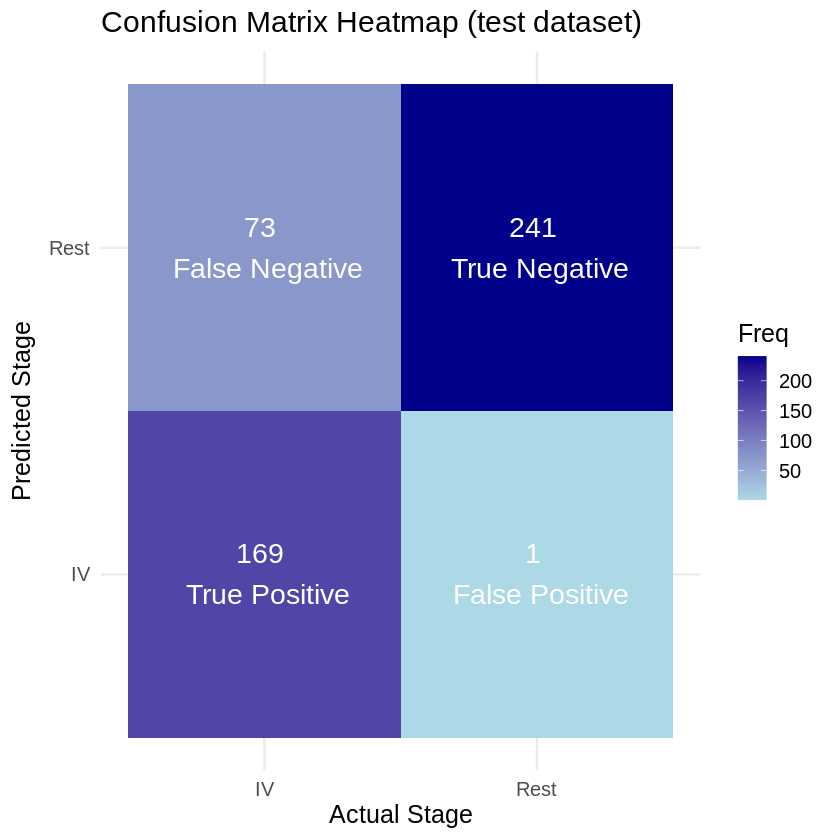

In [ ]:
# Plot the confusion matrix using ggplot2
library(ggplot2)

# Ensure the confusion matrix is stored
cm <- confusionMatrix(pred, test.data$Disease_stage)

# Convert to dataframe for plotting
cm_data <- as.data.frame(cm$table)

# Add labels (Assuming IV is the Positive class)
cm_data$Label <- NA
cm_data$Label[cm_data$Prediction == "IV" & cm_data$Reference == "IV"] <- "True Positive"
cm_data$Label[cm_data$Prediction == "Rest" & cm_data$Reference == "Rest"] <- "True Negative"
cm_data$Label[cm_data$Prediction == "IV" & cm_data$Reference == "Rest"] <- "False Positive"
cm_data$Label[cm_data$Prediction == "Rest" & cm_data$Reference == "IV"] <- "False Negative"

# Plot
ggplot(cm_data, aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = paste(Freq, "\n", Label)), color = "white", size = 6) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Confusion Matrix Heatmap (test dataset)",
       x = "Actual Stage",
       y = "Predicted Stage") +
  theme_minimal(base_size = 15)

**Figure Interpretation**:

The Confusion Matrix heatmap details the classification results on the test set. The model correctly identified 241 benign/early-stage cells (True Negatives) with only 1 False Positive, demonstrating extremely high specificity. However, it misclassified 73 Stage IV cells as 'Rest' (False Negatives), likely reflecting biological heterogeneity where a subset of cells in advanced patients still retain a healthy transcriptomic phenotype. Overall, the results validate that the Secretory Epithelial-2 subpopulation harbours detectable, high-confidence molecular signals of advanced disease.

[1] 0.9750956

OOB 
0.06990679

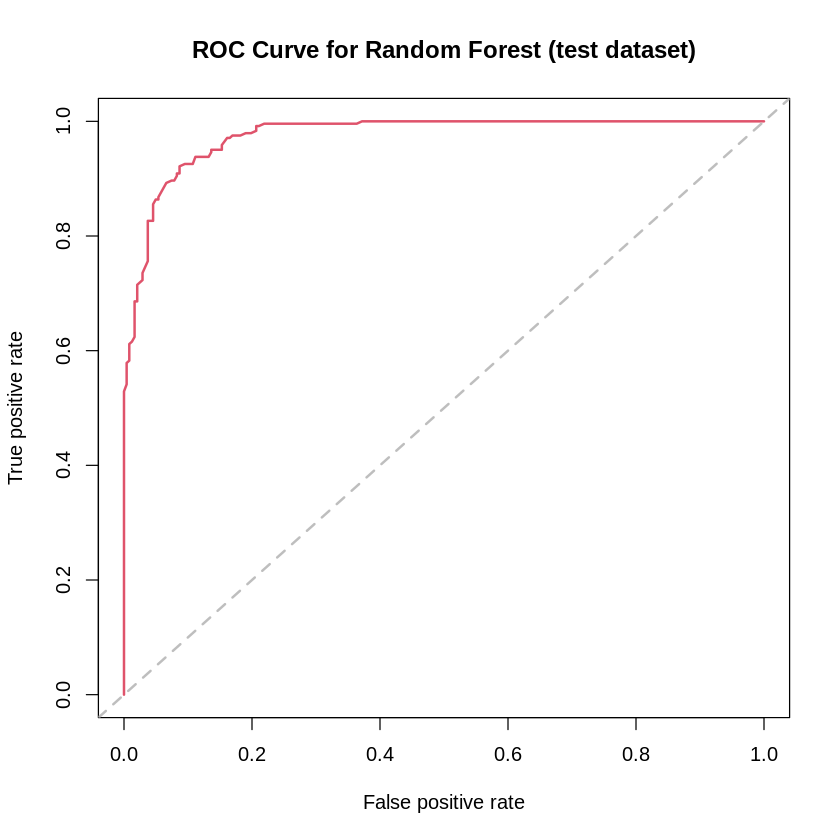

In [ ]:
#Validation AUC
pred1=predict(rf,newdata = test.data,type = "prob")
perf = prediction(pred1[,2],test.data$Disease_stage)
# 1. Area under curve
auc = performance(perf, "auc")
auc <- as.numeric(auc@y.values)
auc
rf$err.rate[nrow(rf$err.rate),1]
# 2. True Positive and Negative Rate
pred3 = performance(perf, "tpr","fpr")
# 3. Plot the ROC curve
plot(pred3,main="ROC Curve for Random Forest (test dataset)",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")


**Figure Interpretation**:

The ROC curve for the held-out test dataset (n=484) confirms the model's generalizability, achieving an AUC of 0.975. This high value indicates that the signatures learned from the balanced training set effectively translate to unseen, imbalanced data.